# 데이터 변형 함수

In [3]:
def add_shake_effect(image):
    h, w = image.shape[:2]
    shake_intensity = 5  # 흔들림 강도

    # 그리드 크기 설정
    grid_size = 20
    grid_h = h // grid_size
    grid_w = w // grid_size

    # 원본 그리드 좌표 생성
    src_points = np.zeros((grid_h * grid_w, 2), dtype=np.float32)
    dst_points = np.zeros((grid_h * grid_w, 2), dtype=np.float32)

    idx = 0
    for i in range(grid_h):
        for j in range(grid_w):
            src_points[idx] = [j * grid_size, i * grid_size]
            dst_points[idx] = [j * grid_size + random.randint(-shake_intensity, shake_intensity),
                               i * grid_size + random.randint(-shake_intensity, shake_intensity)]
            idx += 1

    # 그리드 워핑
    map_x, map_y = np.meshgrid(np.arange(w), np.arange(h))
    map_x = map_x.astype(np.float32)
    map_y = map_y.astype(np.float32)

    for i in range(grid_h):
        for j in range(grid_w):
            src_x, src_y = src_points[i * grid_w + j]
            dst_x, dst_y = dst_points[i * grid_w + j]
            map_x[int(src_y):int(src_y) + grid_size, int(src_x):int(src_x) + grid_size] += dst_x - src_x
            map_y[int(src_y):int(src_y) + grid_size, int(src_x):int(src_x) + grid_size] += dst_y - src_y

    warped_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return warped_image

In [4]:
import cv2
import numpy as np
import os
import random

def random_augment(image):
    # 글자 흔들림 
    if random.choice([True, False]):
        image = add_shake_effect(image)
        
    # 회전
    if random.choice([True, False]):
        angle = random.uniform(-90, 90)
        h, w = image.shape[:2]
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
        image = cv2.warpAffine(image, M, (w, h))
    
    # 플립
    if random.choice([True, False]):
        flip_mode = random.choice([-1, 0, 1])
        image = cv2.flip(image, flip_mode)
    
    # 가우시안 필터
    if random.choice([True, False]):
        ksize = random.choice([9, 11, 13])  # 더 큰 커널 크기 선택
        sigma = random.uniform(0, 5)
        image = cv2.GaussianBlur(image, (ksize, ksize), sigma)

    # 이미지 이동 추가
    if random.choice([True, False]):
        h, w = image.shape[:2]
        tx = random.randint(-w//10, w//10)  # x축 이동 범위
        ty = random.randint(-h//10, h//10)  # y축 이동 범위
        M = np.float32([[1, 0, tx], [0, 1, ty]])
        image = cv2.warpAffine(image, M, (w, h))
    
    # 크롭
    if random.choice([True, False]):
        h, w = image.shape[:2]
        crop_percent = random.uniform(0.8, 0.95)
        crop_w = int(w * crop_percent)
        crop_h = int(h * crop_percent)
        start_x = random.randint(0, w - crop_w)
        start_y = random.randint(0, h - crop_h)
        image = image[start_y:start_y+crop_h, start_x:start_x+crop_w]
    
    return image

# 데이터 가져와서 변형시키기

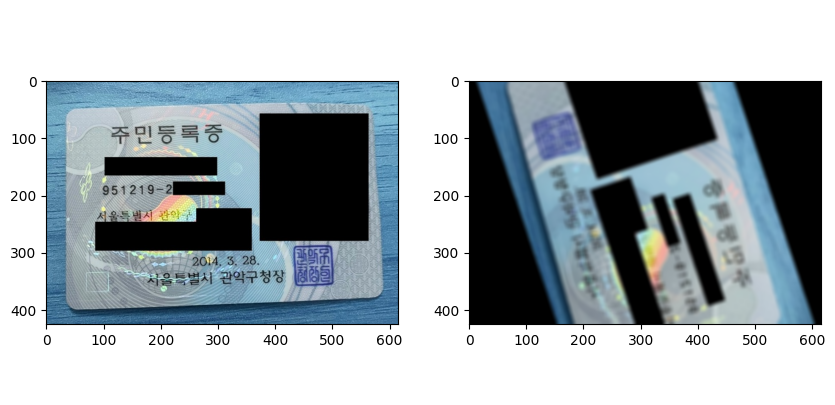

In [7]:
import matplotlib.pyplot as plt

img_path = '/upstage-cv-classification-cv2/data/train/0a1b8d3c52d64052.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
arg_img = random_augment(img)

plt.figure(figsize=(10, 5))
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(arg_img)

In [ ]:
import pandas as pd

train_df = pd.read_csv('/upstage-cv-classification-cv2/data/train.csv')

new_train_df = pd.DataFrame()

